# Task 1

Extract a subset of traning samples from the MNIST handwriten signatures. Create a small convolution neural network with two convolution layers, two pool layers, flatten, dense layer and softmax layer to classify the images. Find out classification error for learning set and testing set.



In [ ]:
import numpy as np
from keras.datasets import mnist
import pandas as pd

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape(-1,28,28,1) 

X_train = X_train[:1000,:,:]

X_test = X_test[:100,:,:]
y_train = y_train[:1000]
y_test  = y_test[:100]
X_test = np.array(X_test)
X_test = X_test.reshape(-1,28,28,1) 

print('X_train shape: ',X_train.shape)
print('X_test shape: ',np.shape(X_test ))
print('y_train shape: ',y_train.shape)
print('y_test shape: ',np.shape(y_test ))

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

print(y_train.shape)
print(y_test.shape)

print(X_train.dtype)
r=np.ptp(X_train,axis=1)
#print(r)
#Normalising data
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print(X_train.dtype)

11490434/11490434 [==============================] - 1s 0us/step
X_train shape:  (1000, 28, 28, 1)
X_test shape:  (100, 28, 28, 1)
y_train shape:  (1000,)
y_test shape:  (100,)
(1000, 10)
(100, 10)
float64
float32


In [ ]:
#Creating model
import tensorflow as tf
import numpy as np
import csv
from datetime import datetime

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="mean_squared_error", metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 100)               8

In [ ]:
# model training with tensorboard visualization


model.fit(X_train, y_train, shuffle=True, validation_split=0.1,
          batch_size=32, epochs= 50, verbose=2)


Epoch 1/50
29/29 - 3s - loss: 0.0900 - accuracy: 0.0900 - val_loss: 0.0900 - val_accuracy: 0.1000 - 3s/epoch - 116ms/step
Epoch 2/50
29/29 - 1s - loss: 0.0900 - accuracy: 0.1178 - val_loss: 0.0899 - val_accuracy: 0.1000 - 1s/epoch - 51ms/step
Epoch 3/50
29/29 - 1s - loss: 0.0900 - accuracy: 0.1178 - val_loss: 0.0899 - val_accuracy: 0.1000 - 1s/epoch - 49ms/step
Epoch 4/50
29/29 - 1s - loss: 0.0900 - accuracy: 0.1178 - val_loss: 0.0899 - val_accuracy: 0.1000 - 1s/epoch - 50ms/step
Epoch 5/50
29/29 - 2s - loss: 0.0899 - accuracy: 0.1178 - val_loss: 0.0899 - val_accuracy: 0.1000 - 2s/epoch - 55ms/step
Epoch 6/50
29/29 - 2s - loss: 0.0898 - accuracy: 0.1178 - val_loss: 0.0897 - val_accuracy: 0.1000 - 2s/epoch - 56ms/step
Epoch 7/50
29/29 - 1s - loss: 0.0894 - accuracy: 0.2333 - val_loss: 0.0892 - val_accuracy: 0.1000 - 1s/epoch - 49ms/step
Epoch 8/50
29/29 - 1s - loss: 0.0876 - accuracy: 0.2533 - val_loss: 0.0861 - val_accuracy: 0.2800 - 1s/epoch - 51ms/step
Epoch 9/50
29/29 - 1s - loss: 0

In [ ]:
eval = model.evaluate(X_test,y_test)
print(eval)

4/4 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.8100
[0.023037351667881012, 0.8100000023841858]


In [ ]:
import cv2 as cv
from matplotlib.pyplot import *
file="mnistTest.png"
image = np.array(cv.imread(file, cv.IMREAD_GRAYSCALE))
#image = cv.resize(file, (28, 28))
image = image.astype('float32')
#image = image.reshape(1, 28, 28, 1)
image = 255-image
image /= 255
plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()
pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)

print(pred.argmax())

NameError: ignored

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

def filter_num(x, y, num):
    keep = (y == num)
    x, y = x[keep], y[keep]
    return x[:100,:,:],y[:100]

x1_train, y1_train = filter_num(x_train, y_train,5)
print("Number of filtered training examples:", len(x1_train))
print(y1_train[55])

x2_train, y2_train = filter_num(x_train, y_train,6)
print("Number of filtered training examples:", len(x2_train))
print(y2_train[55])

xtrain = np.empty(x_train.shape)
ytrain = np.empty(y_train.shape)

for i in range(0,9):
  xtrain , ytrain = np.concatenate(xtrain, ytrain,filter_num(x_train,y_train,i))

print(len(xtrain))


In [ ]:
#class 10/11 thingy
#try to generate random data with repeatition
#def hypergeom_version(x, y, z, data):
#    s = sample(z, data)
#    result = np.repeat(np.arange(x, y), s)
#    return result

#prof example
import numpy as np
import random

data1=[]
#comm=[]
for i in range(5):
  patt=[]
  for j in range(4):
    x=random.random()
    patt.append(x)
  if i>0:
    p=patt+comm
    data1.append(p)
  else:
    comm=patt
print(data1)

data2=[]
for i in range(100):
  r = random.randint(0,3)
  data2.append(data1[r])
data=np.array(data2)
print(data.shape)


In [ ]:
import tensorflow as tf
import numpy as np

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(8,))
model.add(tf.keras.layers.Dense(2,activation="relu"))
model.add(tf.keras.layers.Dense(8,activation="sigmoid"))

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),loss="mse",metrics=["accuracy"])

hist=model.fit(data,data,epochs=50,batch_size=5)
model.save('aeSimpleModel.h5')

In [ ]:
eval = model.evaluate(data,data)
print(eval)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])


In [ ]:
plt.plot(hist.history['loss'])

In [ ]:
#encoder

enc_model = tf.keras.models.Model(name='enc',inputs=model.input,outputs=model.layers[0].output)
enc_model.summary()

dec_model = tf.keras.models.Model(name='dec',inputs=model.layers[1].input, outputs=model.output)
dec_model.summary()

def l_space(d,o,m):
  ev=m.predict(d)
  print(ev.shape)
  plt.scatter(ev[:,0],ev[:,1])
  plt.show()

l_space(data,data,enc_model)

In [ ]:
l_space(data,data,dec_model)

# Task 2

Create an autoencoder for MNIST fashion dataset. The input and the output is the same image of a number 28x28 pixels.



In [22]:
# Example
from keras.layers import *
from keras.models import Model, load_model
from keras.datasets import mnist
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
from keras import optimizers
from keras import backend as K
import scipy
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import pandas as pd
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [23]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape)

(60000, 28, 28, 1)


In [24]:
inputs = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
x = Conv2D(4, (2, 2), activation='relu', padding='same')(x)
x = Conv2D(1, (2, 2), activation='relu', padding='same')(x)
x = Flatten()(x)
encoded = Dense(2, activation='relu')(x)

encoder = Model(inputs=inputs, outputs=encoded)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        9248  

In [27]:

encoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),loss="mse",metrics=["accuracy"])
encoder.fit(x_train, y_train,
                epochs=5,
                batch_size=256)

Epoch 1/5
235/235 [==============================] - 98s 408ms/step - loss: 2.0881 - accuracy: 0.1195
Epoch 2/5
235/235 [==============================] - 96s 407ms/step - loss: 1.3915 - accuracy: 0.1213
Epoch 3/5
235/235 [==============================] - 95s 404ms/step - loss: 1.3050 - accuracy: 0.1302
Epoch 4/5
235/235 [==============================] - 96s 408ms/step - loss: 1.2473 - accuracy: 0.1235
Epoch 5/5
235/235 [==============================] - 95s 404ms/step - loss: 1.2249 - accuracy: 0.1277



## Subtask 1

 Use two dense layers (hidden and output). Hidden layer with 2 neurons, output layer with 784 neurons. Plot the response of hidden neurons in scatter plot, number categories distinquish by colors.


In [23]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
shapee=x_train.shape[1:]
print(shapee)
#Rescale  dataset

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

(784,)


In [32]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Input(shape=(784,)))
model1.add(tf.keras.layers.Dense(2,activation="relu"))
model1.add(tf.keras.layers.Dense(784,activation="sigmoid"))
autoencoder1 = tf.keras.models.Model(name='enc',inputs=model1.input,outputs=model1.layers[1].output)
autoencoder1.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])
autoencoder1.summary()

Model: "enc"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_36 (Dense)            (None, 2)                 1570      
                                                                 
 dense_37 (Dense)            (None, 784)               2352      
                                                                 
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [34]:
autoencoder1.fit(x_train, x_train,
                epochs=5,
                batch_size=32,
                )

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2738 - accuracy: 0.0157
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2413 - accuracy: 0.0151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2370 - accuracy: 0.0132
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2344 - accuracy: 0.0130
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2322 - accuracy: 0.0125


In [29]:
def plot_response(model_encoder, images,labels):
    # just for the encoder
    encoded_images = model_encoder.predict(images)
    model_encoder.summary()

    X = encoded_images[:,0]
    Y = encoded_images[:,1]

    print(encoded_images.shape)
    colors = ["red","green","blue","yellow","orange","lightblue", "grey", "black", "lightgreen", "darkred"]
    color_of_label = []
    for i in range(len(labels[:])):
        color_of_label.append(colors[labels[i]])


    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(X,Y,c=color_of_label)

def extract_layers(model, idx_start_layer, idx_end_layer):
    sub_model = tf.keras.Sequential()
    for idx in range(idx_start_layer, idx_end_layer+1):
        layer = model.get_layer(index = idx)
        sub_model.add(layer)
    return sub_model

1875/1875 [==============================] - 2s 982us/step
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 2)                 1570      
                                                                 
Total params: 1,570
Trainable params: 1,570
Non-trainable params: 0
_________________________________________________________________
(60000, 2)


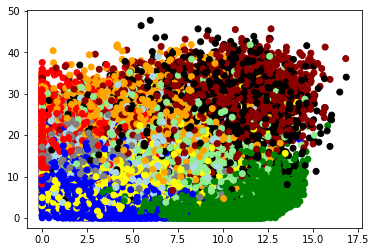

In [51]:
encoder = extract_layers(autoencoder1,0,1)
plot_response(encoder,x_train,y_train)

In [26]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#x_train = x_train[:10000]
#x_test = x_test[:1000]
#y_train = y_train[:10000]
#y_test = y_test[:1000]
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [ ]:
import keras
from keras import layers

encoding_dim = 2 


input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

encoder = keras.Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='mse',metrics = ['accuracy'])

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 1570      
                                                                 
 dense_3 (Dense)             (None, 784)               2352      
                                                                 
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=50,
                )

Epoch 1/5
1200/1200 [==============================] - 6s 5ms/step - loss: 20.2774 - accuracy: 0.0847
Epoch 2/5
1200/1200 [==============================] - 4s 4ms/step - loss: 20.2774 - accuracy: 0.0912
Epoch 3/5
1200/1200 [==============================] - 4s 4ms/step - loss: 20.2774 - accuracy: 0.0945
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 20.2774 - accuracy: 0.0964
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: 20.2774 - accuracy: 0.0984


1875/1875 [==============================] - 2s 1ms/step
(60000, 784)


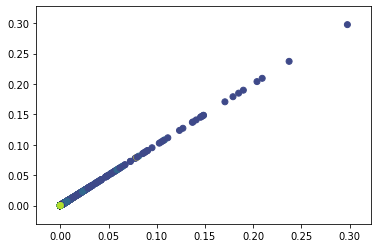

In [52]:
def l_space(d,o,m):
  ev=m.predict(d)
  print(ev.shape)
  plt.scatter(ev[:,1],ev[:,1],c=y_train)
  plt.show()

l_space(x_train,y_train,autoencoder1)

In [1]:
#Write your code here
import matplotlib.pyplot as plt
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(t_x[0].shape,))
model.add(tf.keras.layers.Dense(2,activation="relu"))
model.add(tf.keras.layers.Dense(784,activation="sigmoid"))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),loss="mse",metrics=["accuracy"])


#hist=model.fit(t_x,t_y,epochs=100,batch_size=5)

# filters, biases = enc_model.layers[1].get_weights()
# print(enc_model.layers[1].name,filters.shape)

# f = filters[:, 0]
# ax = pyplot.imshow(f[:], cmap='gray')
# ax.set_xticks([])
# ax.set_yticks([])
# pyplot.show()

NameError: ignored

Model: "enc"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 784)               2352      
                                                                 
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________
32/32 [==============================] - 0s 2ms/step
(1000, 784)


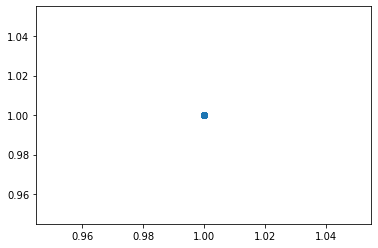

In [ ]:
enc_model = tf.keras.models.Model(name='enc',inputs=model.input,outputs=model.layers[1].output)
enc_model.summary()
def l_space(d,o,m):
  ev=m.predict(d)
  print(ev.shape)
  plt.scatter(ev[:,1],ev[:,1])
  plt.show()

l_space(t_x,t_y,enc_model)


In [41]:
import tensorflow as tf
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_X_1, train_Y_1), (test_X_1, test_Y_1) = fashion_mnist.load_data()



train_X_1 = train_X_1.reshape((len(train_X_1), np.prod(train_X_1.shape[1:])))
test_X_1 = test_X_1.reshape((len(test_X_1), np.prod(test_X_1.shape[1:])))
S=train_X_1.shape[1:]

print(S)



train_X_1 = train_X_1.astype('float32') / 255.
test_X_1 = test_X_1.astype('float32') / 255.




input_dataset_image = keras.Input(shape=(784,))



encoded = keras.layers.Dense(2, activation='relu')(input_dataset_image)



Dec = keras.layers.Dense(784, activation='sigmoid')(encoded)

Encoder = keras.Model(input_dataset_image, Dec)


Encoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam')
Encoder.summary()

(784,)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_31 (Dense)            (None, 2)                 1570      
                                                                 
 dense_32 (Dense)            (None, 784)               2352      
                                                                 
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [42]:
Encoder.fit(train_X_1, train_X_1, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4347
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3999
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3894
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3819
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3780


1875/1875 [==============================] - 7s 4ms/step


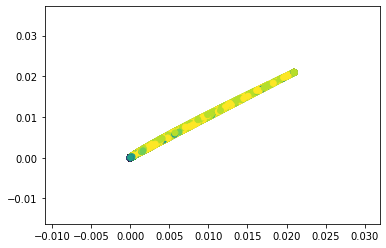

In [44]:
output=Encoder.predict(train_X_1)
plt.scatter(output[:,0],output[:,1] , c=train_Y_1)
plt.show()

In [53]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 2  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
#encoder = keras.Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 4s 12ms/step - loss: 0.6212 - val_loss: 0.5331
Epoch 2/10
235/235 [==============================] - 2s 11ms/step - loss: 0.4348 - val_loss: 0.3390
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2628 - val_loss: 0.1970
Epoch 4/10
235/235 [==============================] - 2s 11ms/step - loss: 0.1522 - val_loss: 0.1152
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0909 - val_loss: 0.0708
Epoch 6/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0574 - val_loss: 0.0461
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0383 - val_loss: 0.0316
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0267 - val_loss: 0.0225
Epoch 9/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0194 - val_loss: 0.0166
Epoch 10/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0145 - val_lo

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_39 (Dense)            (None, 2)                 1570      
                                                                 
 dense_40 (Dense)            (None, 784)               2352      
                                                                 
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________
1875/1875 [==============================] - 6s 3ms/step
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 2)                 1570      
                                           

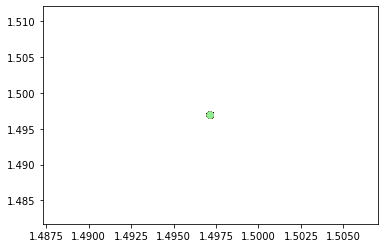

In [51]:
autoencoder.summary()
encoder = extract_layers(autoencoder,0,1)
plot_response(encoder,x_train,y_train)

In [54]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images[:5000].astype('float32')/255
train_labels = train_labels[:5000].astype('float32')/255

import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Dense(2,activation='relu')(input_img)
decoded = layers.Dense(784,activation='sigmoid')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

autoencoder.fit(
    train_images, train_images,
    batch_size=128,
    epochs=5,
    verbose=1
)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 dense_45 (Dense)            (None, 28, 28, 2)         4         
                                                                 
 dense_46 (Dense)            (None, 28, 28, 784)       2352      
                                                                 
Total params: 2,356
Trainable params: 2,356
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


ValueError: in user code:

    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\engine\training.py", line 1053, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\losses.py", line 1486, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 784 and 28 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](model_11/dense_46/Sigmoid, IteratorGetNext:1)' with input shapes: [?,28,28,784], [?,28,28].


(60000, 784)
(10000, 784)
Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0898
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0592
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0522
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0480
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0460
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0452
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0449
Epoch 8/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0447
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0446
Epoch 10/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0446
Model: "model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (Inpu

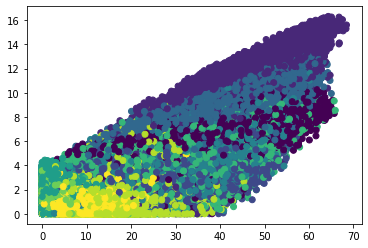

In [34]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#x_train = x_train[:10000]
#x_test = x_test[:1000]
#y_train = y_train[:10000]
#y_test = y_test[:1000]
print(x_train.shape)
print(x_test.shape)




model3 = keras.Sequential()
model3.add(keras.Input(shape=(784,)))
model3.add(keras.layers.Dense(2, activation = 'relu'),) #Hidden layer 1
model3.add(keras.layers.Dense(784, activation='sigmoid')) #Output layer



model3.compile(optimizer = "adam", loss = "mse")

model3.fit(x = x_train, y = x_train, epochs = 10,shuffle=True, batch_size=64)

# print(model3.layers[0].output)
# print(model3.input)



autoencoder=keras.Model(name='model3',inputs=model3.input,outputs=model3.layers[0].output)
autoencoder.summary()

autoencoder.compile(optimizer = "adam", loss = "mse")


def plot(model_no):
    m=model_no.predict(x_train)
    plt.scatter(m[:,0],m[:,1],c=y_train)
    plt.show()


#autoencoder.fit(x = x_train, y = x_train, epochs = 10,shuffle=True, batch_size=64)
#AFTER TRAINING THE MODEL RESPONSE OF HIDDEN LAYER IN SCATTER PLOT
plot(autoencoder)


## Subtask 2

Modify Subtask 1 so that you add three hidden layers and 2 latent features, i.e.
784-10-2-10-784 neurons. Observe differences.



(60000, 784)
(10000, 784)
Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0629
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0457
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0411
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0393
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0384
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0377
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0372
Epoch 8/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0368
Epoch 9/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0364
Epoch 10/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0362
Model: "model4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (Inpu

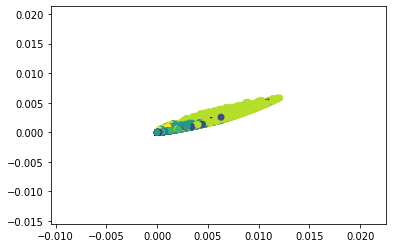

In [37]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)




model4 = keras.Sequential()
model4.add(keras.Input(shape=(784,)))
model4.add(keras.layers.Dense(10, activation = 'relu'))
model4.add(keras.layers.Dense(2, activation = 'relu'))
model4.add(keras.layers.Dense(10, activation = 'relu')) #Hidden layer 1
model4.add(keras.layers.Dense(784, activation='sigmoid')) #Output layer



model4.compile(optimizer = "adam", loss = "mse")
model4.fit(x = x_train, y = x_train, epochs = 10,shuffle=True, batch_size=64)


# print(model3.layers[0].output)
# print(model3.input)



autoencoder1=keras.Model(name='model4',inputs=model4.input,outputs=model4.layers[-1].output)
autoencoder1.summary()

#autoencoder.compile(optimizer = "adam", loss = "mse")


def plot(model_no):
    m=model_no.predict(x_train)
    plt.scatter(m[:,0],m[:,1],c=y_train)
    plt.show()


#autoencoder.fit(x = x_train, y = x_train, epochs = 10,shuffle=True, batch_size=64)
#AFTER TRAINING THE MODEL RESPONSE OF HIDDEN LAYER IN SCATTER PLOT
plot(autoencoder1)

In [27]:
#Write your code here
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers

latent_dim = 10



model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Input(shape=(784,)))
model2.add(tf.keras.layers.Dense(latent_dim,activation="relu"))
model2.add(tf.keras.layers.Dense(2,activation="relu"))
model2.add(tf.keras.layers.Dense(latent_dim,activation="relu"))
model2.add(tf.keras.layers.Dense(784,activation="sigmoid"))
autoencoder2 = tf.keras.models.Model(name='enc',inputs=model2.input,outputs=model2.layers[3].output)
autoencoder2.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])
autoencoder2.summary()

#autoencoder2 = keras.Model(input_img, output)
autoencoder2.compile(optimizer='adam', loss='mse',metrics = ['accuracy'])

#autoencoder2.summary()




Model: "enc"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_24 (Dense)            (None, 10)                7850      
                                                                 
 dense_25 (Dense)            (None, 2)                 22        
                                                                 
 dense_26 (Dense)            (None, 10)                30        
                                                                 
 dense_27 (Dense)            (None, 784)               8624      
                                                                 
Total params: 16,526
Trainable params: 16,526
Non-trainable params: 0
_________________________________________________________________


In [32]:
hist=autoencoder2.fit(x_train,y_train,epochs=5,batch_size=50)

Epoch 1/5
1200/1200 [==============================] - 8s 7ms/step - loss: 20.2774 - accuracy: 0.0970
Epoch 2/5
1200/1200 [==============================] - 7s 6ms/step - loss: 20.2774 - accuracy: 0.0982
Epoch 3/5
1200/1200 [==============================] - 6s 5ms/step - loss: 20.2774 - accuracy: 0.0987
Epoch 4/5
1200/1200 [==============================] - 6s 5ms/step - loss: 20.2774 - accuracy: 0.0990
Epoch 5/5
1200/1200 [==============================] - 6s 5ms/step - loss: 20.2774 - accuracy: 0.0992


1875/1875 [==============================] - 5s 2ms/step
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                7850      
                                                                 
 dense_25 (Dense)            (None, 2)                 22        
                                                                 
 dense_26 (Dense)            (None, 10)                30        
                                                                 
Total params: 7,902
Trainable params: 7,902
Non-trainable params: 0
_________________________________________________________________
(60000, 10)


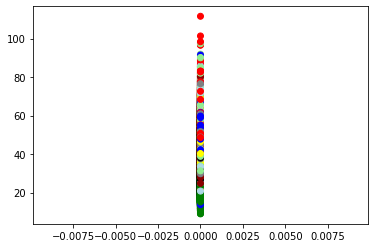

In [34]:
encoder1 = extract_layers(autoencoder2,0,3)
plot_response(encoder1,x_train,y_train)

## Subtask 3

Modify Subtask 1 so that you add convolution layers, pooling layers, ... for the autoencoder and observe differences.


In [30]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

inputs = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
x = Conv2D(4, (2, 2), activation='relu', padding='same')(x)
x = Conv2D(1, (2, 2), activation='relu', padding='same')(x)
x = Flatten()(x)
encoded = Dense(2, activation='relu')(x)

encoder = Model(inputs=inputs, outputs=encoded)
encoder.summary()



encoder.compile(optimizer = "adam", loss = "mse")



# print(model3.layers[0].output)
# print(model3.input)



encoder.fit(x = x_train, y = x_train, epochs = 10,shuffle=True, batch_size=64)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 32)        9248

InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/mean_squared_error/BroadcastGradientArgs' defined at (most recent call last):
    File "C:\Users\aman0\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "C:\Users\aman0\Anaconda3\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\aman0\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
      app.start()
    File "C:\Users\aman0\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
      self.io_loop.start()
    File "C:\Users\aman0\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\aman0\Anaconda3\lib\asyncio\base_events.py", line 534, in run_forever
      self._run_once()
    File "C:\Users\aman0\Anaconda3\lib\asyncio\base_events.py", line 1771, in _run_once
      handle._run()
    File "C:\Users\aman0\Anaconda3\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\aman0\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
      ret = callback()
    File "C:\Users\aman0\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
      self.run()
    File "C:\Users\aman0\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
      yielded = self.gen.send(value)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\aman0\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\aman0\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
      user_expressions, allow_stdin,
    File "C:\Users\aman0\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
      raw_cell, store_history, silent, shell_futures)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
      return runner(coro)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\aman0\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-30-2d015dac53c7>", line 49, in <module>
      encoder.fit(x = x_train, y = x_train, epochs = 10,shuffle=True, batch_size=64)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 577, in minimize
      loss, var_list=var_list, grad_loss=grad_loss, tape=tape
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 635, in _compute_gradients
      tape, loss, var_list, grad_loss
    File "C:\Users\aman0\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/mean_squared_error/BroadcastGradientArgs'
Incompatible shapes: [64,2] vs. [64,28,28,1]
	 [[{{node gradient_tape/mean_squared_error/BroadcastGradientArgs}}]] [Op:__inference_train_function_131034]

In [ ]:
def plot(model_no):
    m=model_no.predict(x_train)
    plt.scatter(m[:,0],m[:,1],c=y_train)
    plt.show()



#AFTER TRAINING THE MODEL RESPONSE OF HIDDEN LAYER IN SCATTER PLOT
plot(autoencoder)

In [22]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images[:5000].astype('float32')/255
train_labels = train_labels[:5000].astype('float32')/255

import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='linear', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='tanh', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='tanh', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='tanh', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='tanh', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='linear')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='linear', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

autoencoder.fit(
    train_images, train_images,
    batch_size=128,
    epochs=50,
    verbose=1
)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 7, 7, 8)           584 

KeyboardInterrupt: 


## Subtask 4

Extract the decoder from the autoencoder of subtask 1-3 and generate new images based on randomly generated latent features. Plot generated images.



In [38]:
dec_model3 = tf.keras.models.Model(name='dec',inputs=model3.layers[1].input, outputs=model3.output)
dec_model3.summary()

Model: "dec"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_28 (Dense)            (None, 784)               2352      
                                                                 
Total params: 2,352
Trainable params: 2,352
Non-trainable params: 0
_________________________________________________________________


In [39]:
dec_model4 = tf.keras.models.Model(name='dec4',inputs=model4.layers[1].input, outputs=model4.output)
dec_model4.summary()

Model: "dec4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 10)]              0         
                                                                 
 dense_38 (Dense)            (None, 2)                 22        
                                                                 
 dense_39 (Dense)            (None, 10)                30        
                                                                 
 dense_40 (Dense)            (None, 784)               8624      
                                                                 
Total params: 8,676
Trainable params: 8,676
Non-trainable params: 0
_________________________________________________________________
